Author: Tenzin Tashi <br/>
CSc: 44700 - ML <br/>
Assignment 2<br/>

### Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

### Import the Iris data set


In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_min, x_max = X.min() - 0.5, X.max() + 1.5

### Get Iris classifications

In [ ]:
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


### Setup Iris feature lablels


In [ ]:
IrisF = iris.feature_names
for i in range(0,4):
    print(IrisF[i])

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Function to create sample array of features and classes from the original set

In [ ]:
def sample_features_classes(classes: list, features: list):
    ''' 
    Function to create a sub-set of sample array of features and classes from the original 
    dataset from the given list of classes and features.
    
    Parameters
    ----------
    classes: list
             This array contains the classes to be considered.
             It can be either 2 classes or all 3 classes (i.e., between 2-3). 
    features: list
              This array contains the features to be considered.
              It can be either a list of 1 features or a list of all 4 features (i.e., between 1-4).
    
    Returns
    -------
    XX: nArray
        It includes only the features from the original dataset specified for the given list of features.
    YY: nArray
        It includes only the classes from the original dataset specified in the given list of classes.
    '''
    global X, Y, IC
    
    cdx = np.array(classes)        # this array contains the classes to be considered (can be 2-3 classes)
    fdx = np.array(features)       # this array contains the features to be considered (can be 1-4 features)
    
    nC = len(cdx)
    nF = len(fdx)
    
    print ('\nClasses')
    for i in range(nC):
        print (cdx[i],IrisC[cdx[i]])

    print ('\nFeatures')
    for i in range(nF):
        print (fdx[i],IrisF[fdx[i]])
    
    i = 0
    numY = 0
    
    for i in range(len(Y)):
        for j in range(nC):
            if Y[i] == IC[cdx[j]]:
                numY += 1
    
    YY = np.zeros((numY))
    XX = np.zeros((numY,nF))
    
    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    
    return XX, YY

In [ ]:
def draw_graph(XX, YY, cdx: list, fdx: list, clf):
    '''
    Funtion to draw graph
    
    Code from Professor Erik's sample code
    
    Parameters
    ----------
    XX: nArray
        This array contains the sample features from the original dataset.
    YY: nArray
        This array contains the sample classes from the original dataset.
    cdx: List
         This array contains the classes to be considered.
         It can be either 2 classes or all 3 classes (i.e., between 2-3). 
    fdx: list
         This array contains the features to be considered.
         It can be either a list of 1 features or a list of all 4 features (i.e., between 1-4)
    clf: Class Object:
         Object of a given classifier
    
    '''
    global IC
    if (len(fdx) == 1):
        XXzeros0 = (0. * XX) + .2
        XXzeros1 = (0. * XX) 
        XXzeros2 = (0. * XX) - .2
    
    if len(fdx) == 1:
        fig, ax = plt.subplots(figsize=(8,2))
    
        xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
        yy = clf.predict(xx)

        xxzeros1 = (0. * xx) + .5

        # plot the decision regions

        if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                        color=pltC[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                        color=pltC[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                        color=pltC[2], marker='.')   

        # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(-1.,+2.)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.axes.yaxis.set_visible(False)
        ax.legend(loc='upper right', fontsize='x-small')
        plt.show()    

    elif (len(fdx) == 2):

        fig, ax = plt.subplots(figsize=(8,8))

        xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
        yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        yy = yy.reshape(xx1.shape)

        # plot the decision regions    

        if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                        color=pltCback[0], marker='.')
        if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                        color=pltCback[1], marker='.')
        if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                        color=pltCback[2], marker='.')    

        # plot the data

        if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                        color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                        color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                        color=pltC[2], marker=pltM[2], label=IrisC[2])

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_xlabel(IrisF[fdx[0]])
        ax.set_ylabel(IrisF[fdx[1]])
        ax.legend(loc='upper right', fontsize='small')
        plt.show()    

    elif (len(fdx) == 3):
    
        ixm = fdx[0]
        iym = fdx[1]
        izm = fdx[2]
        xF = IrisF[ixm]
        yF = IrisF[iym]
        zF = IrisF[izm]

        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show() 

    # if there are two classes, add the decision boundary and plot again

        A = clf.fit(XX,YY)
        Acl =  A.classes_
        if (len(Acl) == 2):  

            fig = plt.figure(figsize=(6,6))    
            ax = plt.axes(projection='3d')   

        # plot the data points

            if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
                color=pltC[0], marker=pltM[0], label=IrisC[0])
            if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
                color=pltC[1], marker=pltM[1], label=IrisC[1])
            if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
                color=pltC[2], marker=pltM[2], label=IrisC[2])    


            Ai = A.intercept_
            Acoef = A.coef_
            xgrid = np.arange(x_min,x_max,0.1)       
            nx = len(xgrid)
            for i in range(nx):
                for j in range(nx):
                    z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                    if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

            ax.set_xlim(x_min,x_max)
            ax.set_ylim(x_min,x_max)
            ax.set_zlim(x_min,x_max)
            ax.set_xlabel(xF)
            ax.set_ylabel(yF)
            ax.set_zlabel(zF)            
            ax.legend(loc='upper right', fontsize='small')
            plt.show()         


In [ ]:
def run_model(XX, YY, model=SGDClassifier, tol=1e-4, penalty='l2', max_iter=1000, random_state=0, epsilon=0.1, loss='hinge'):
    '''
    Function to train the model using the given classifier (default = Stochastic Gradient Descent (SGD) Classification)
    which is an "One vs All" scheme and printing the Accuracy score from each dataset-model pairs.    
    
    Parameters
    ----------
    XX: nArray
        This array contains the sample features from the original dataset.
    YY: nArray
        This array contains the sample classes from the original dataset.
    model: Class of a classifier
    tol: float
         The tolerance for the model
    random_state: int
                  
    
    Returns
    -------
    clf: Class Object
         It returns a object of the given classifier after fitting the data
    '''
    clf = model(tol=tol, penalty=penalty, max_iter=max_iter, random_state=random_state, epsilon=epsilon, loss=loss)
    clf.fit(XX,YY)
    print('\nAccuracy for the {} model: {}%'.format(str(clf).split('(')[0], clf.score(XX,YY)*100))
    return clf
    

### Combinations for classes

In [ ]:
# As mention in assignment we list all the combination of the classes
select_2C = [[0,1], [0,2], [1,2]]            # Choosing 2 classes
select_3C = [[0,1,2]]                        # Choosing 3 classes

### Combinations for features

In [ ]:
# As mention in assignment we list all the combination of the features
select_1F = [[0], [1], [2], [3]]                           # Choosing 1 features
select_2F = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]     # Choosing 2 features
select_3F = [[0,1,2], [0,1,3], [0,2,3], [1,2,3]]           # Choosing 3 features
select_4F = [[0,1,2,3]]                                    # Choosing 4 features

In [ ]:
count = 1

### Choosing 1 feature with 2 classes

( 1 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)

Accuracy for the SGDClassifier model: 82.0%


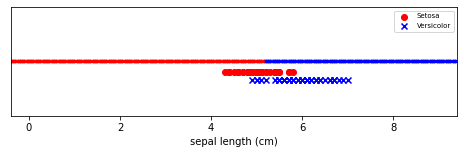

( 2 )

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)

Accuracy for the SGDClassifier model: 76.0%


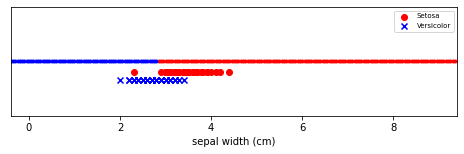

( 3 )

Classes
0 Setosa
1 Versicolor

Features
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


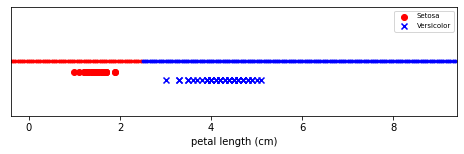

( 4 )

Classes
0 Setosa
1 Versicolor

Features
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


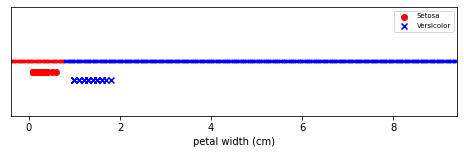

( 5 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)

Accuracy for the SGDClassifier model: 91.0%


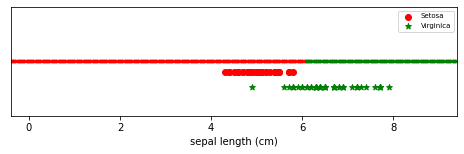

( 6 )

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)

Accuracy for the SGDClassifier model: 50.0%


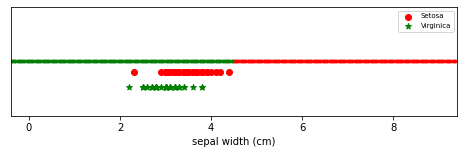

( 7 )

Classes
0 Setosa
2 Virginica

Features
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


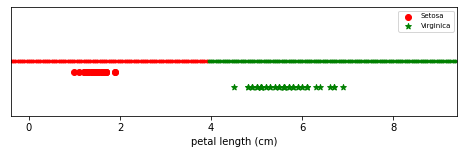

( 8 )

Classes
0 Setosa
2 Virginica

Features
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


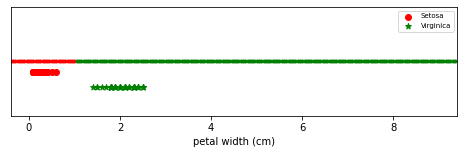

( 9 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

Accuracy for the SGDClassifier model: 52.0%


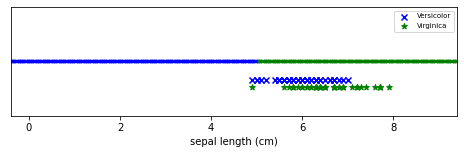

( 10 )

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

Accuracy for the SGDClassifier model: 50.0%


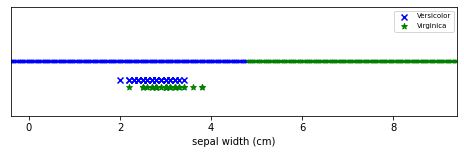

( 11 )

Classes
1 Versicolor
2 Virginica

Features
2 petal length (cm)

Accuracy for the SGDClassifier model: 88.0%


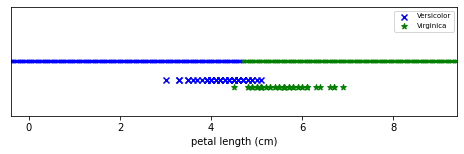

( 12 )

Classes
1 Versicolor
2 Virginica

Features
3 petal width (cm)

Accuracy for the SGDClassifier model: 94.0%


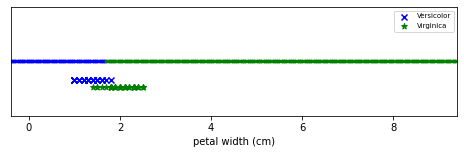

In [ ]:

for classes in select_2C:
    for feature in select_1F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier, tol=1e-4, random_state=1, epsilon=0.01, loss='log')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation


When using 1 feature with 2 classes, we get the lowest accuracy of 50% i.e., for ```Class: Setosa and Virginica``` with  ```feature: Sepal Width``` and ```Class: Versicolor and Virginica``` with  ```feature: Sepal Width```. Similarly, we get the highest accuracy of 100% for ```Class: Setosa and Versicolor``` with  ```feature: Petal Length, Petal Width``` and ```Class: Setosa and Virginica``` with  ```feature: Petal Length, Petal Width```. 

Classes/Features| Sepal Length | Sepal Width | Petal Length  | Petal Width
----------|--------------|-------------|---------------|-------------
Setosa/Versicolor|82|76|100|100
Setosa/Virginica|91|50|100|100
Versicolor/Virginica|52|50|88|94

### Choosing 1 feature with 3 classes

( 13 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

Accuracy for the SGDClassifier model: 67.33333333333333%


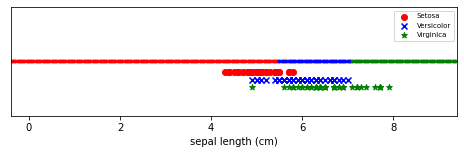

( 14 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

Accuracy for the SGDClassifier model: 54.0%


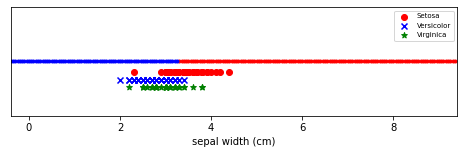

( 15 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)

Accuracy for the SGDClassifier model: 70.66666666666667%


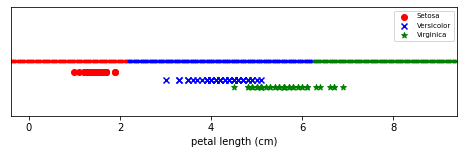

( 16 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
3 petal width (cm)

Accuracy for the SGDClassifier model: 94.66666666666667%


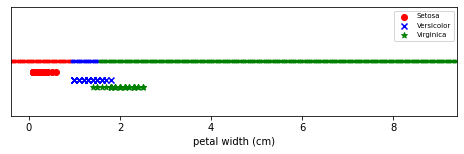

In [ ]:
for classes in select_3C:
    for feature in select_1F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
#         clf = run_model(XX, YY, model=SGDClassifier)
        clf = run_model(XX, YY, model=SGDClassifier, loss='log')
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

When using 1 feature with 3 classes, we get the lowest accuracy of 54%, for ```Class: Setosa, Versicolor and Virginica``` with  ```feature: Sepal Width```. And, we get the highest accuracy of 94.67% for ```feature: Petal Width```. 

Classes/Features| Sepal Length | Sepal Width | Petal Length  | Petal Width
----------|--------------|-------------|---------------|-------------
Setosa/Versicolor/Virginica|67.33|54|70.67|94.67

### Choosing 2 feature with 2 classes

( 17 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SGDClassifier model: 99.0%


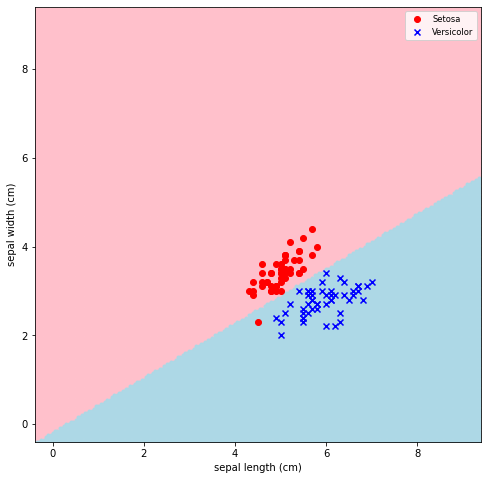

( 18 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


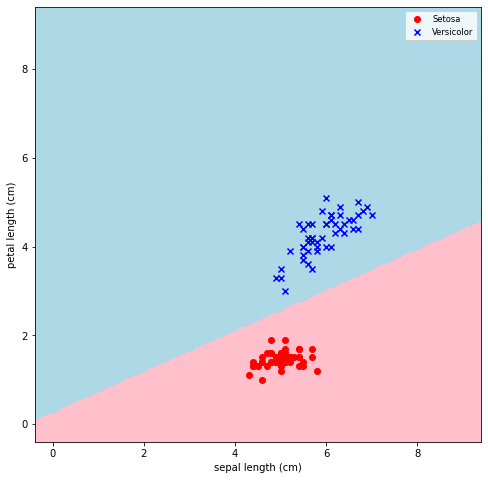

( 19 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


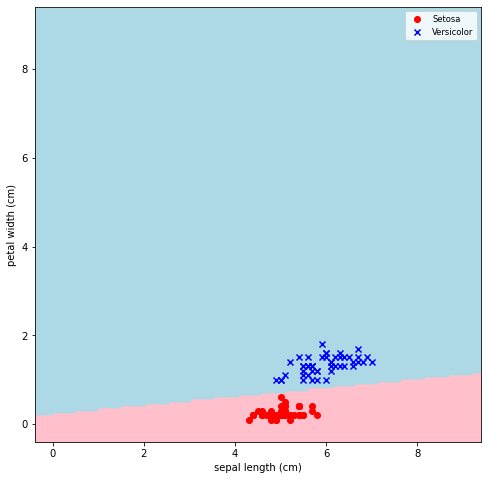

( 20 )

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


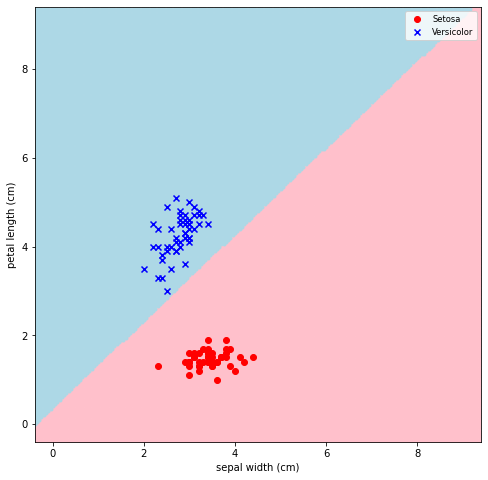

( 21 )

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


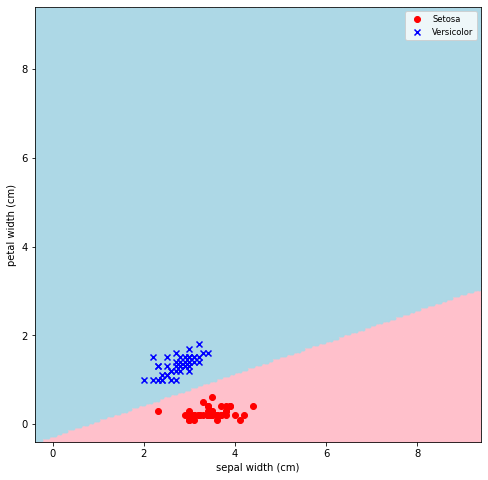

( 22 )

Classes
0 Setosa
1 Versicolor

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


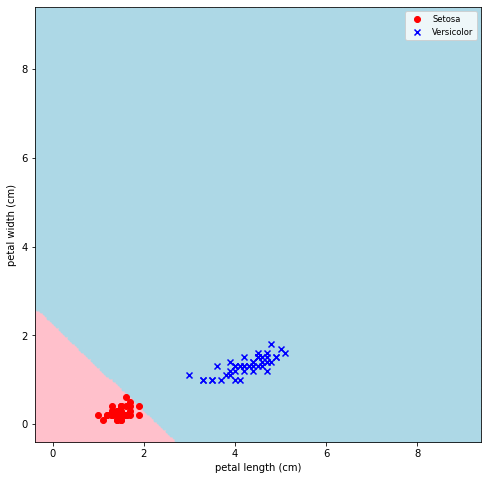

( 23 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SGDClassifier model: 99.0%


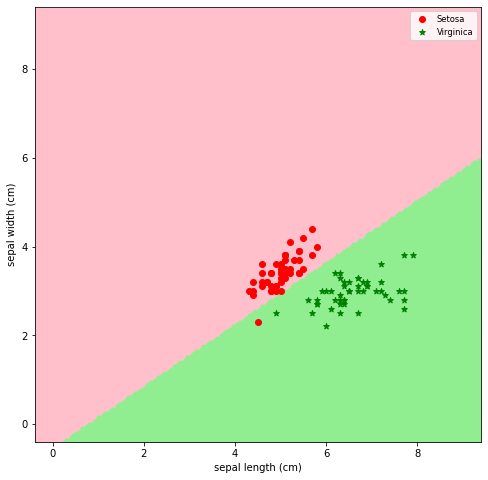

( 24 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


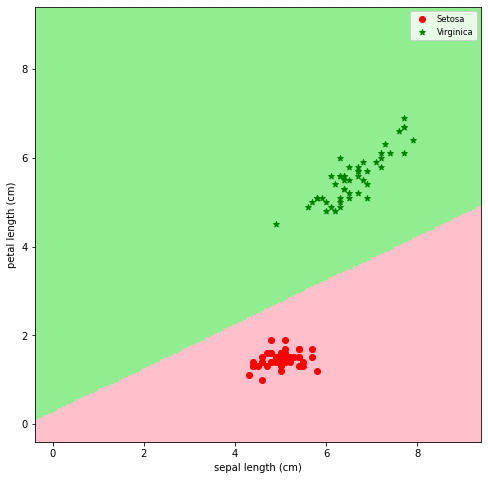

( 25 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


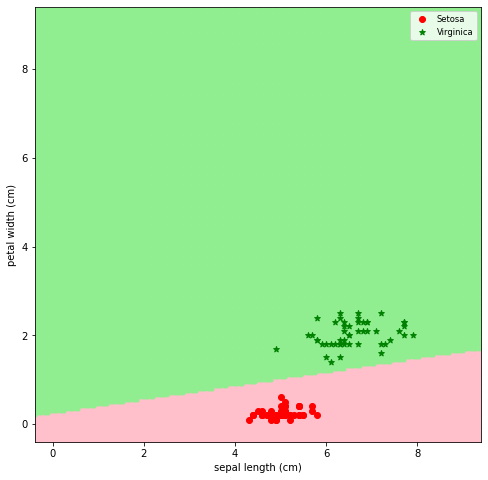

( 26 )

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


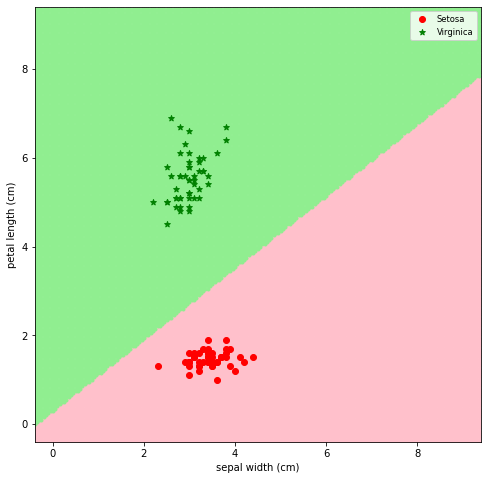

( 27 )

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


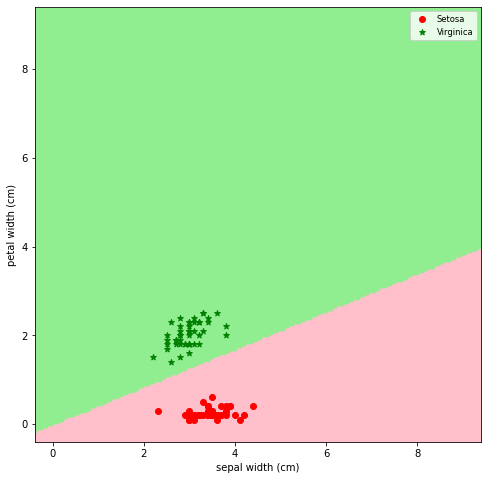

( 28 )

Classes
0 Setosa
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


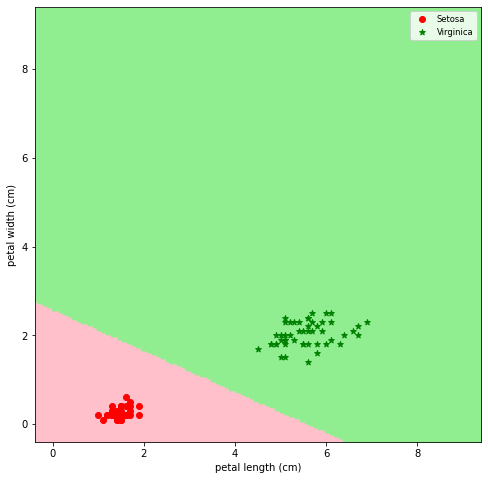

( 29 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SGDClassifier model: 74.0%


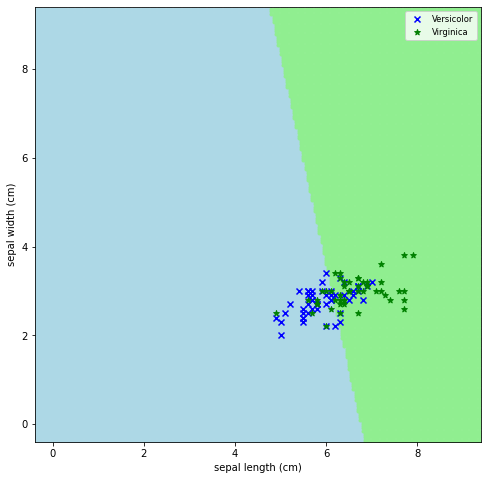

( 30 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 92.0%


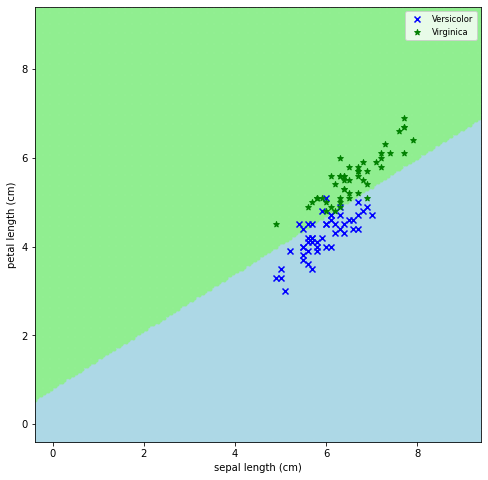

( 31 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 63.0%


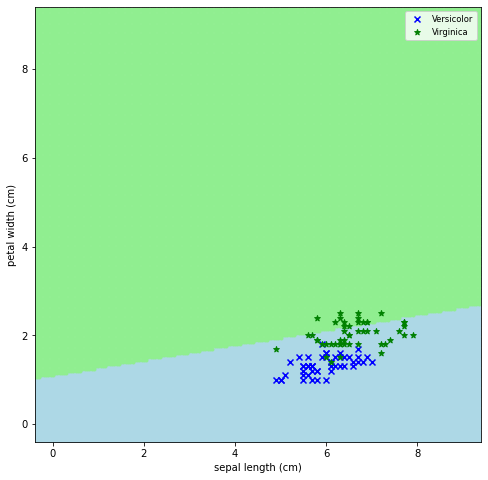

( 32 )

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 91.0%


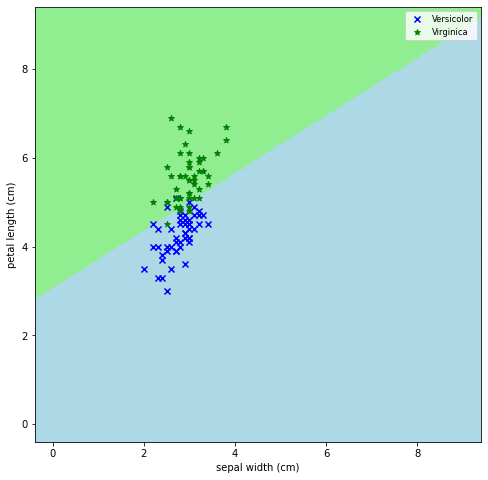

( 33 )

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 87.0%


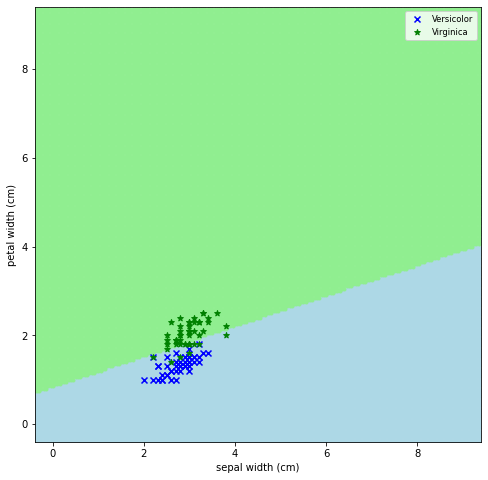

( 34 )

Classes
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 90.0%


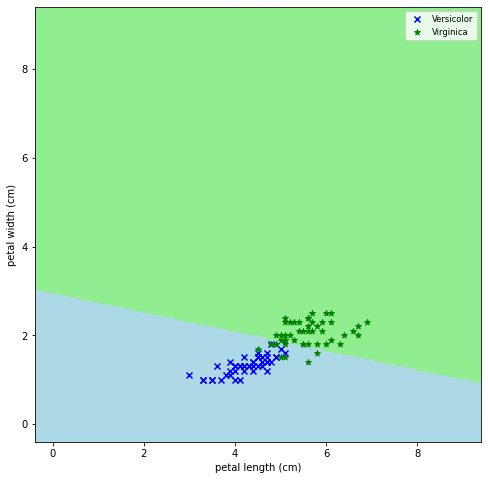

In [ ]:
for classes in select_2C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

When using 2 feature with 2 classes, the SGDClassifier doesn't give good accuracy for the class `Versicolor and Virginica` but for the choose of class containing 1 `Setosa` the model gives almost a perfect accuracy of 99% or 100%.

Classes/Features | Sepal Length +  Sepal Width | Sepal Length + Petal Length  | Sepal Length + Petal Width | Sepal Width + Petal Length | Sepal Width + Petal Width | Petal Length + Petal Width
----|------|------|--------|-------------|---------------|-------------
Setosa/Versicolor|99|100|100|100|100|100
Setosa/Virginica|99|100|100|100|100|100
Versicolor/Virginica|74|94|63|91|87|90

### Choosing 2 feature with 3 classes

( 35 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

Accuracy for the SGDClassifier model: 77.33333333333333%


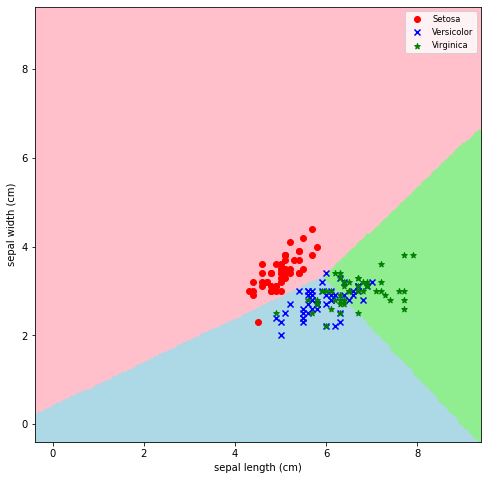

( 36 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 87.33333333333333%


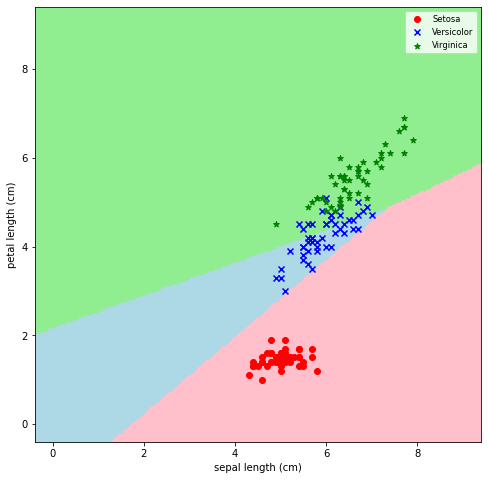

( 37 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 94.0%


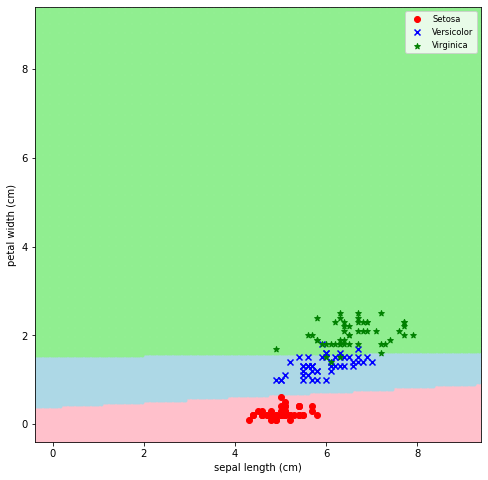

( 38 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 88.66666666666667%


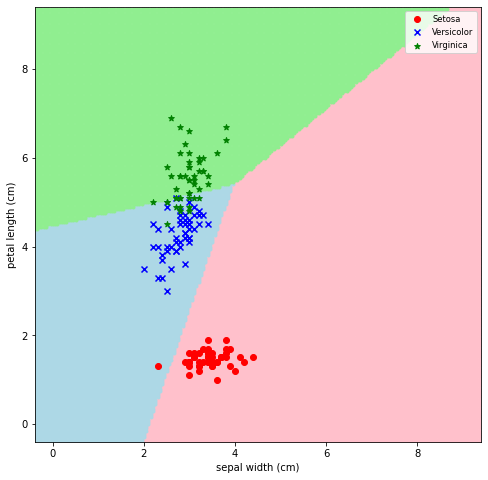

( 39 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 89.33333333333333%


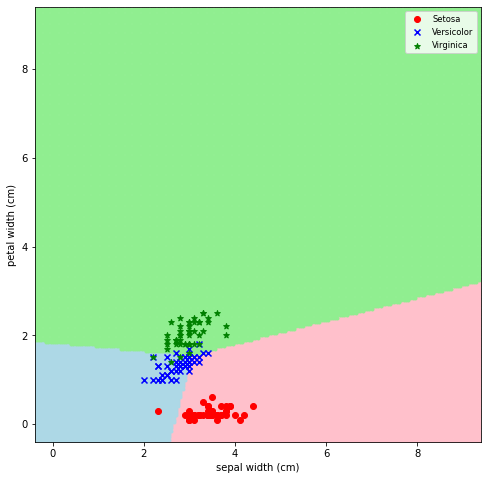

( 40 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 96.0%


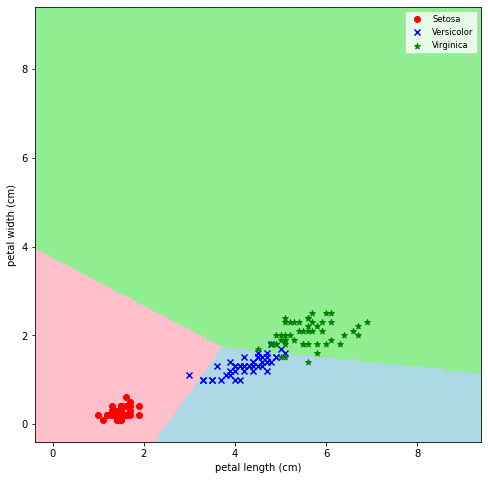

In [ ]:
for classes in select_3C:
    for feature in select_2F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

When we choose 2 feature with 3 classes the highest accuracy received was 96%, and the lowest accuracy was 73.33%

Classes/Features | Sepal Length +  Sepal Width | Sepal Length + Petal Length  | Sepal Length + Petal Width | Sepal Width + Petal Length | Sepal Width + Petal Width | Petal Length + Petal Width
----|------|------|--------|-------------|---------------|-------------
Setosa/Versicolor/Virginica|73.33|87.33|94|88.67|89.33|96

### Choosing 3 feature with 2 classes

( 41 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


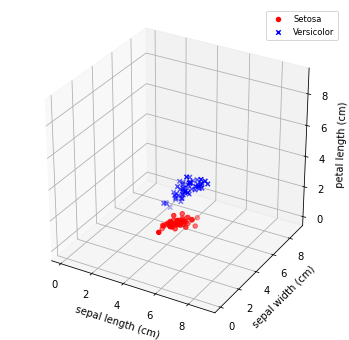

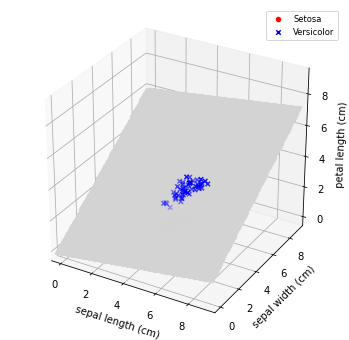

( 42 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


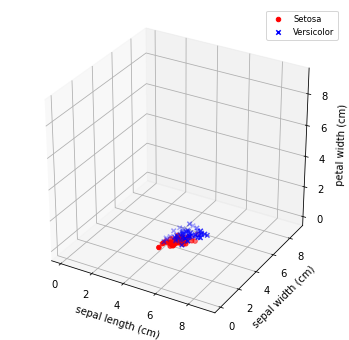

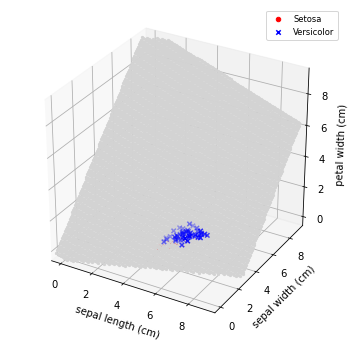

( 43 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


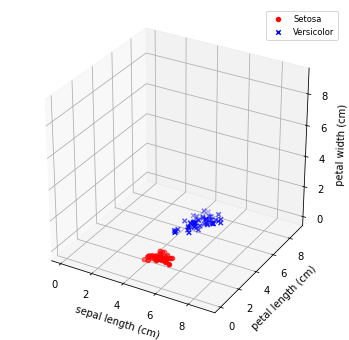

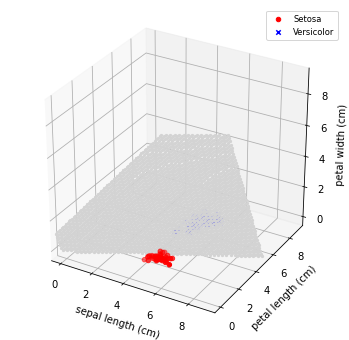

( 44 )

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


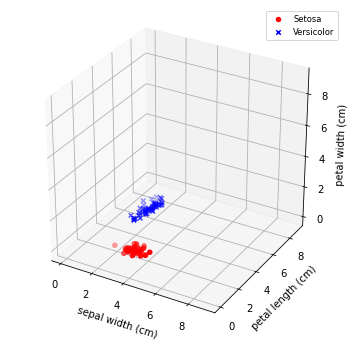

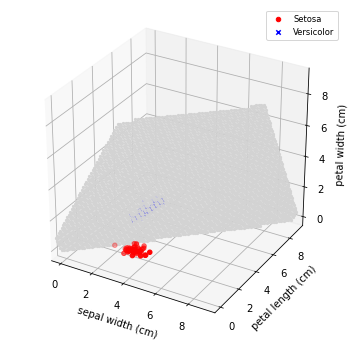

( 45 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 100.0%


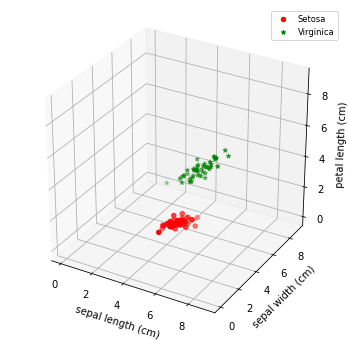

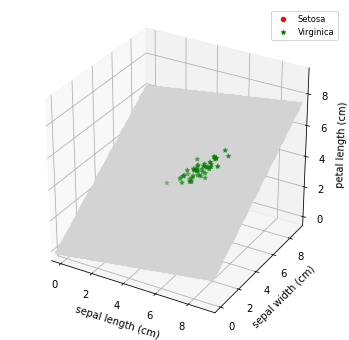

( 46 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


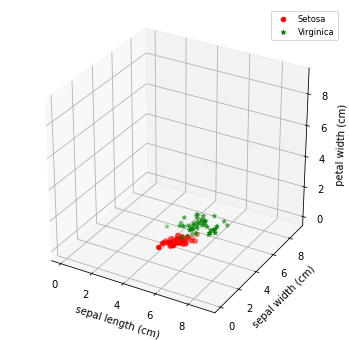

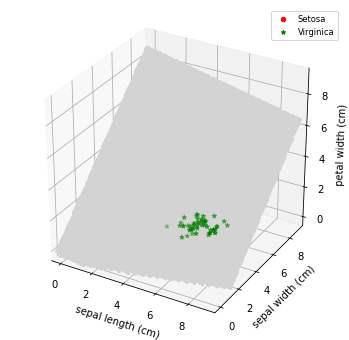

( 47 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


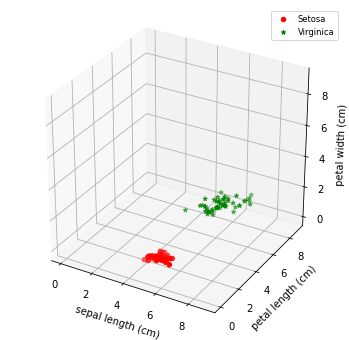

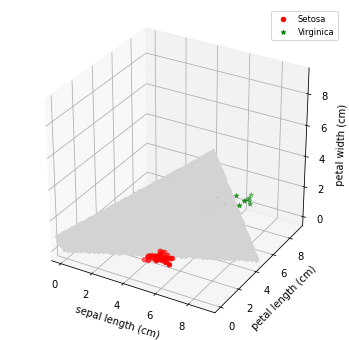

( 48 )

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%


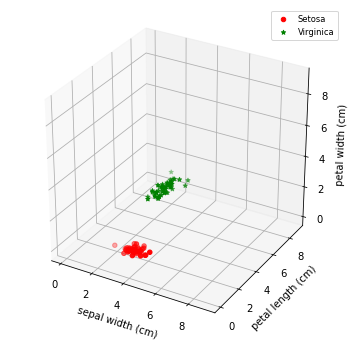

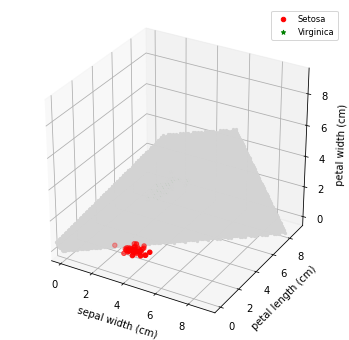

( 49 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 89.0%


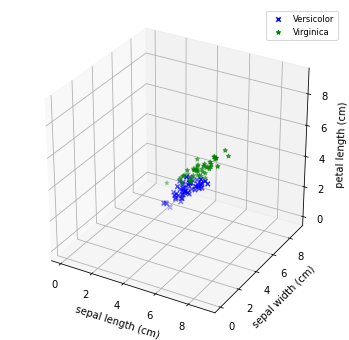

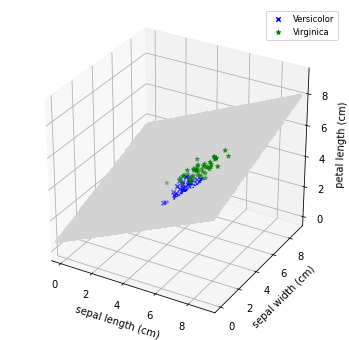

( 50 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 91.0%


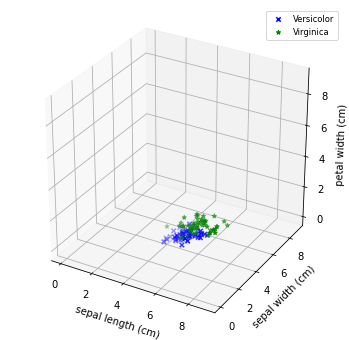

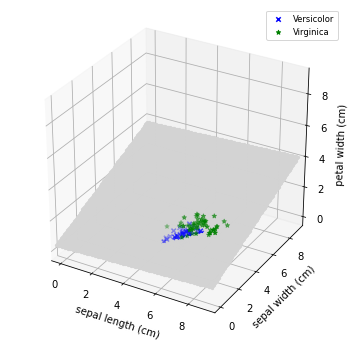

( 51 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 75.0%


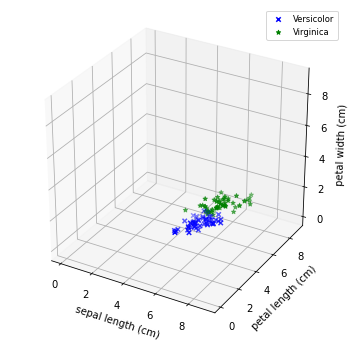

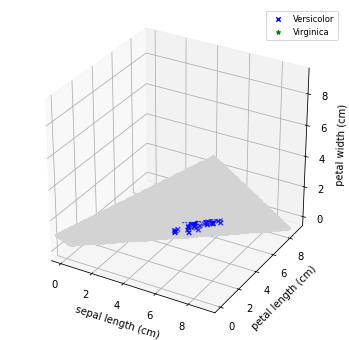

( 52 )

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 90.0%


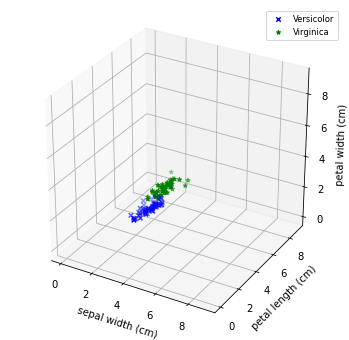

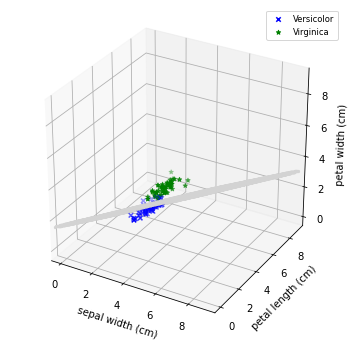

In [ ]:
for classes in select_2C:
    for feature in select_3F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

When 3 feature with 2 classes were choosen the highest accuracy was 100% and the lowest accuracy was 75%.

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  | Sepal Length + Sepal Width  + Petal Width | Sepal Length + Petal Length + Petal Width | Sepal Width + Petal Length + Petal Width
----|------|---------------|-------------|---------------------------
Setosa/Versicolor|100|100|100|100
Setosa/Virginica|100|100|100|100
Versicolor/Virginica|89|91|75|90

### Choosing 3 feature with 3 classes

( 53 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

Accuracy for the SGDClassifier model: 88.66666666666667%


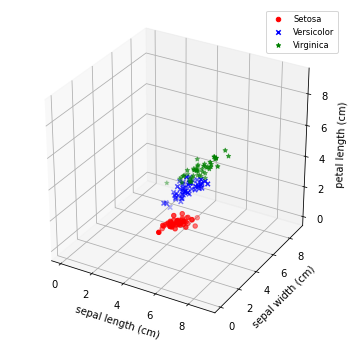

( 54 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 92.66666666666666%


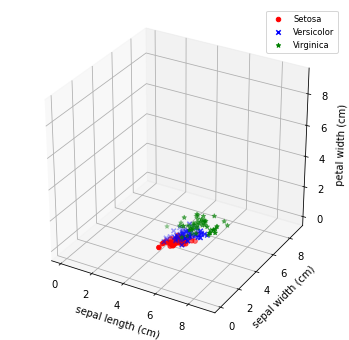

( 55 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 79.33333333333333%


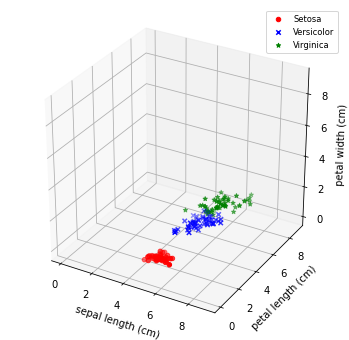

( 56 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 91.33333333333333%


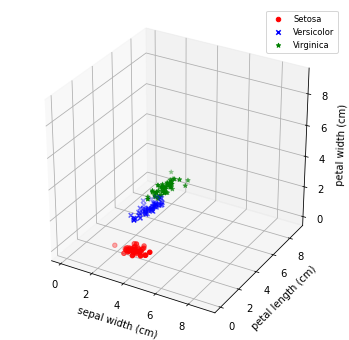

In [ ]:
for classes in select_3C:
    for feature in select_3F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

### Observation

For 3 features with 3 classes, the SGDClassifier gave the highest accuracy of 92.67% and the lowest accuracy of 79.33%. 

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  | Sepal Length + Sepal Width  + Petal Width | Sepal Length + Petal Length + Petal Width | Sepal Width + Petal Length + Petal Width
----|------|---------------|-------------|---------------------------
Setosa/Versicolor/Virginica|88.67|92.67|79.33|91.33

### Choosing 4 feature with 2 classes

In [ ]:
for classes in select_2C:
    for feature in select_4F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

( 57 )

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%
( 58 )

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 100.0%
( 59 )

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 83.0%


### Observation

It is observed that the SGDClassifier with 4 feature and 2 classes,gives the highest accuracy of 100% and lowest accuracy of 83%.

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  + Petal Width 
----------------|---------------------------
Setosa/Versicolor|100
Setosa/Virginica|100
Versicolor/Virginica|83

### Choosing 4 feature with 3 classes

In [ ]:
for classes in select_3C:
    for feature in select_4F:
        print('(',count,')')
        XX, YY = sample_features_classes(classes=classes, features=feature)
        clf = run_model(XX, YY, model=SGDClassifier)
        draw_graph(XX, YY, cdx=classes, fdx=feature, clf=clf)
        count += 1

( 60 )

Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

Accuracy for the SGDClassifier model: 96.66666666666667%


### Observation

When all 4 features were selected with all 3 classes we get the accuracy of 96.67 %.

Classes/Features | Sepal Length +  Sepal Width  + Petal Length  + Petal Width 
----------------|---------------------------
Setosa/Versicolor/Virginica|96.67

### Explanation

In the above 60 dataset-model pairs, we can see that the SGDClassifier does a good job of creating a decision boundary with high accuracy when the data points are seperated or are not being overlapped. The reason behind is that this classifier uses the One vs All schema, for example if we look at the output 5 we can see that it is being correctly classified the setosa class till the end but some data points of virginica is not because in OVA if the class is classified as 1 group then at the same time that class is consider not to be in other group. This model uses the tolerance(tol) of 1e-4 meaning the traning will stop when the `loss > best_loss -tol`, random_state is used to shuffle the data and we have set it to 0, penalty is set to its default value 'l2', max_iter is the maximum number of passes over the training data and it is set to its default value, the epsilon is the threshold value, i.e., any differences between the current prediction and the correct label are ignored if they are less than this threshold, and the loss function is also keep its default value of 'hinge'.